# 🔬 Phân tích Tiền xử lý Dữ liệu và Trích xuất Đặc trưng

Notebook này minh họa từng bước tiền xử lý dữ liệu và trích xuất 25 features từ ảnh mắt.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage

plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

## 📂 Load và Khám phá Dữ liệu

In [21]:
# Load sample images
open_path = 'data/eyes/open'
closed_path = 'data/eyes/closed'

# Get sample images
open_files = [f for f in os.listdir(open_path) if f.endswith(('.jpg', '.png'))][:2]
closed_files = [f for f in os.listdir(closed_path) if f.endswith(('.jpg', '.png'))][:2]

# Load images
open_images = [cv2.imread(os.path.join(open_path, f), cv2.IMREAD_GRAYSCALE) for f in open_files]
closed_images = [cv2.imread(os.path.join(closed_path, f), cv2.IMREAD_GRAYSCALE) for f in closed_files]

print(f"📊 Dataset Overview:")
print(f"Open eye images: {len(open_images)}")
print(f"Closed eye images: {len(closed_images)}")
print(f"Original image shapes: {[img.shape for img in open_images]}")

📊 Dataset Overview:
Open eye images: 2
Closed eye images: 2
Original image shapes: [(82, 82), (81, 81)]


In [1]:
# Hiển thị ảnh gốc
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, img in enumerate(open_images):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f'Open Eye {i+1}\nShape: {img.shape}')
    axes[0, i].axis('off')

for i, img in enumerate(closed_images):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f'Closed Eye {i+1}\nShape: {img.shape}')
    axes[1, i].axis('off')

plt.suptitle('Dữ liệu Gốc - Raw Images', fontsize=16)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

## 🔧 Tiền xử lý - CLAHE + Gaussian Blur

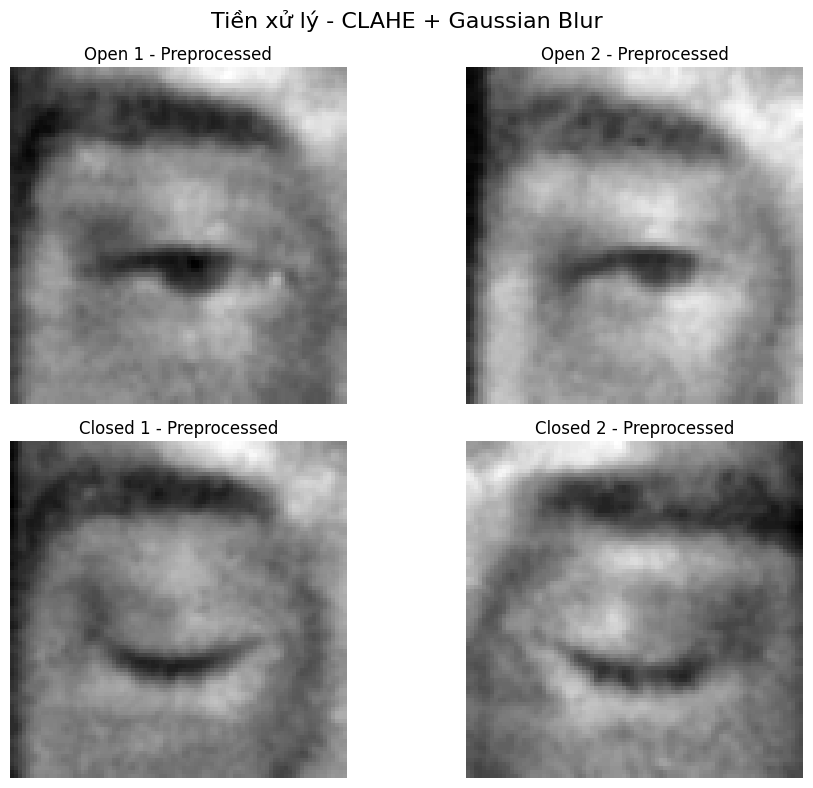

✅ Tiền xử lý hoàn tất:
   1. CLAHE (Contrast Limited Adaptive Histogram Equalization)
   2. Gaussian Blur (3x3 kernel) để giảm noise
   3. Resize về 32x32 sẽ được thực hiện trong bước trích xuất features


In [23]:
def preprocess_eye_image(image):
    """Tiền xử lý ảnh mắt theo đúng pipeline thực tế"""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image = clahe.apply(image)

    # Gaussian blur to reduce noise
    image = cv2.GaussianBlur(image, (3, 3), 0)

    return image

# Áp dụng tiền xử lý cho tất cả ảnh
open_preprocessed = [preprocess_eye_image(img) for img in open_images]
closed_preprocessed = [preprocess_eye_image(img) for img in closed_images]

# Visualization kết quả tiền xử lý
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, img in enumerate(open_preprocessed):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f'Open {i+1} - Preprocessed')
    axes[0, i].axis('off')

for i, img in enumerate(closed_preprocessed):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f'Closed {i+1} - Preprocessed')
    axes[1, i].axis('off')

plt.suptitle('Tiền xử lý - CLAHE + Gaussian Blur', fontsize=16)
plt.tight_layout()
plt.show()

print("✅ Tiền xử lý hoàn tất:")
print("   1. CLAHE (Contrast Limited Adaptive Histogram Equalization)")
print("   2. Gaussian Blur (3x3 kernel) để giảm noise")
print("   3. Resize về 32x32 sẽ được thực hiện trong bước trích xuất features")

## 📊 Trích xuất Đặc trưng Thống kê (6 features)

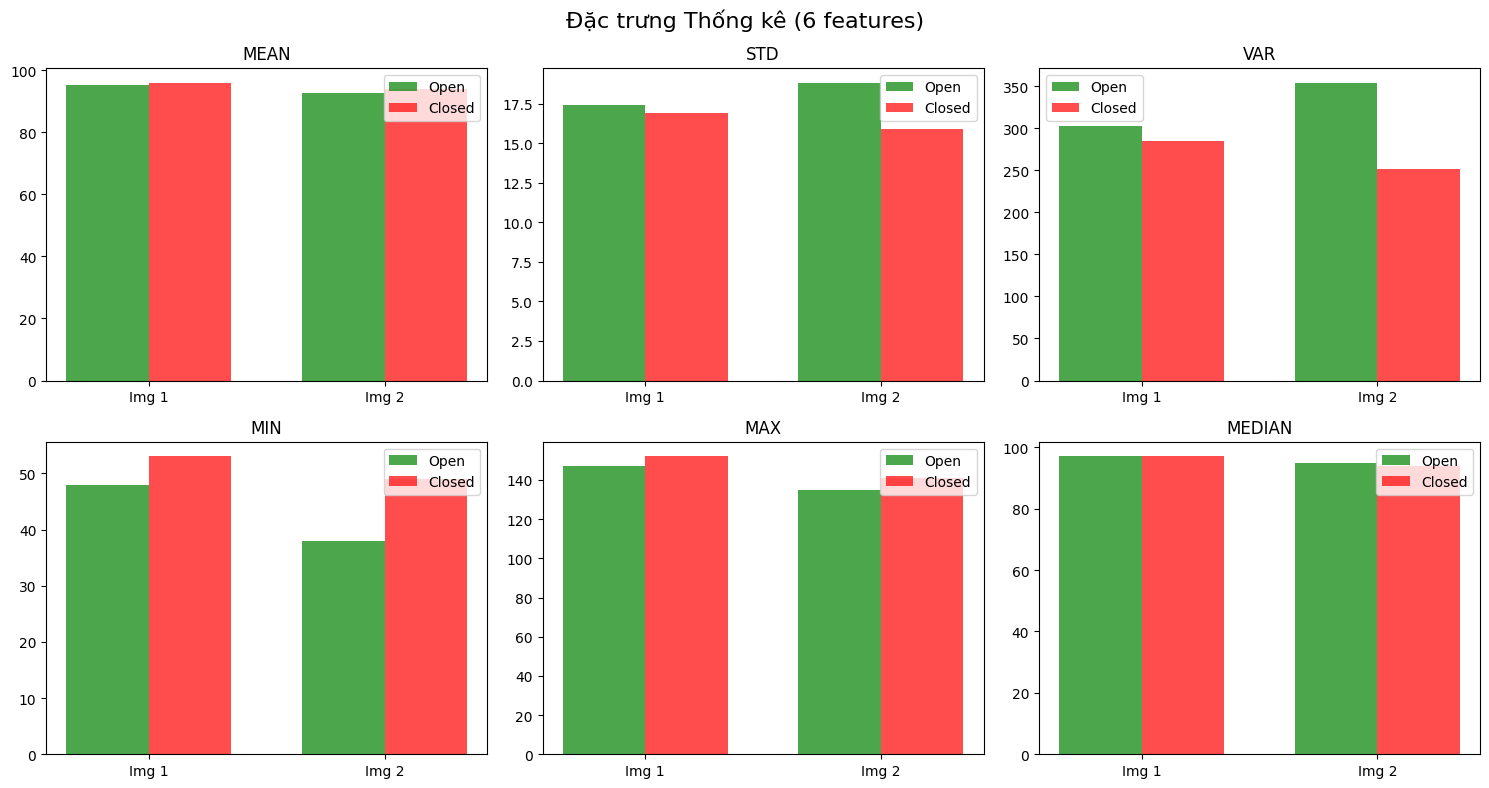

📈 Phân tích Đặc trưng Thống kê:
    MEAN: Open=93.87, Closed=94.96, Diff=1.09
     STD: Open=18.11, Closed=16.37, Diff=1.73
     VAR: Open=328.38, Closed=268.40, Diff=59.97
     MIN: Open=43.00, Closed=51.00, Diff=8.00
     MAX: Open=141.00, Closed=146.50, Diff=5.50
  MEDIAN: Open=96.00, Closed=95.50, Diff=0.50


In [24]:
def extract_statistical_features(img):
    """Trích xuất 6 đặc trưng thống kê cơ bản"""
    return {
        'mean': np.mean(img),
        'std': np.std(img),
        'var': np.var(img),
        'min': np.min(img),
        'max': np.max(img),
        'median': np.median(img)
    }

# Resize về 32x32 và tính toán features
open_resized = [cv2.resize(img, (32, 32)) for img in open_preprocessed]
closed_resized = [cv2.resize(img, (32, 32)) for img in closed_preprocessed]

open_stats = [extract_statistical_features(img) for img in open_resized]
closed_stats = [extract_statistical_features(img) for img in closed_resized]

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
metrics = ['mean', 'std', 'var', 'min', 'max', 'median']

for i, metric in enumerate(metrics):
    row, col = i // 3, i % 3
    
    open_vals = [s[metric] for s in open_stats]
    closed_vals = [s[metric] for s in closed_stats]
    
    x = np.arange(len(open_vals))
    width = 0.35
    
    axes[row, col].bar(x - width/2, open_vals, width, label='Open', alpha=0.7, color='green')
    axes[row, col].bar(x + width/2, closed_vals, width, label='Closed', alpha=0.7, color='red')
    axes[row, col].set_title(f'{metric.upper()}')
    axes[row, col].legend()
    axes[row, col].set_xticks(x)
    axes[row, col].set_xticklabels([f'Img {i+1}' for i in range(len(open_vals))])

plt.suptitle('Đặc trưng Thống kê (6 features)', fontsize=16)
plt.tight_layout()
plt.show()

print("📈 Phân tích Đặc trưng Thống kê:")
for metric in metrics:
    open_avg = np.mean([s[metric] for s in open_stats])
    closed_avg = np.mean([s[metric] for s in closed_stats])
    print(f"{metric.upper():>8}: Open={open_avg:.2f}, Closed={closed_avg:.2f}, Diff={abs(open_avg-closed_avg):.2f}")

## 🎯 Trích xuất Đặc trưng Texture (3 features)

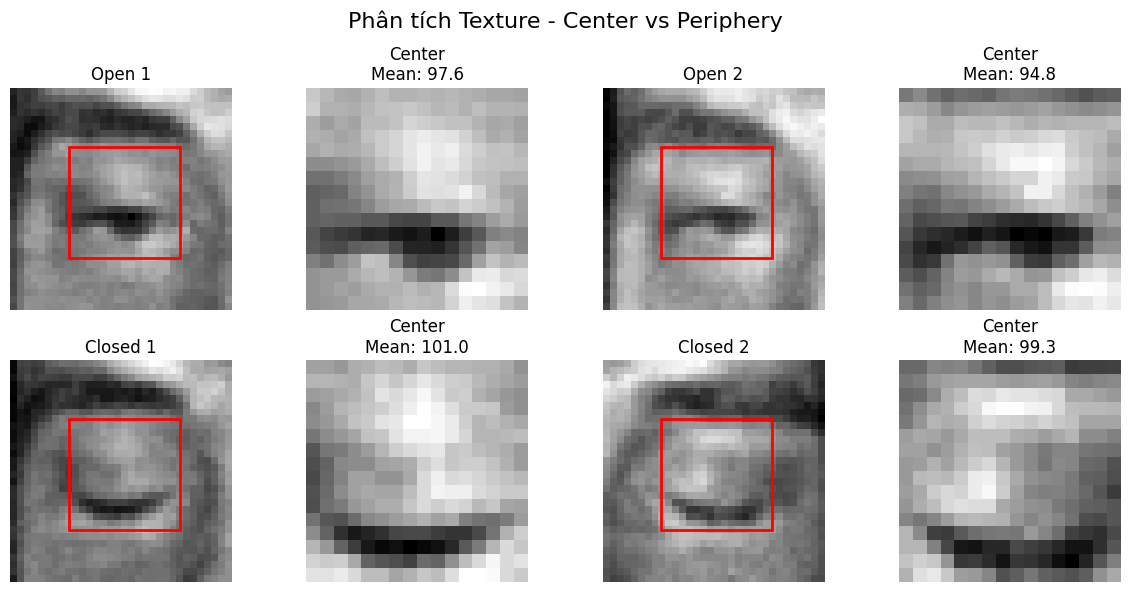

🎯 Phân tích Đặc trưng Texture:
              center_mean: Open=96.17, Closed=100.15, Diff=3.98
           periphery_mean: Open=93.10, Closed=93.23, Diff=0.13
center_periphery_contrast: Open=3.07, Closed=6.93, Diff=3.86


In [25]:
def extract_texture_features(img):
    """Trích xuất 3 đặc trưng texture"""
    h, w = img.shape
    
    # 1. Center region analysis
    center_h, center_w = h//4, w//4
    center_region = img[center_h:3*center_h, center_w:3*center_w]
    center_mean = np.mean(center_region)
    
    # 2. Periphery analysis
    periphery_mean = (np.sum(img) - np.sum(center_region)) / (h*w - center_region.size)
    
    # 3. Contrast between center and periphery
    contrast = center_mean - periphery_mean
    
    return {
        'center_mean': center_mean,
        'periphery_mean': periphery_mean,
        'center_periphery_contrast': contrast
    }

# Visualization của texture analysis
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, img in enumerate(open_resized):
    h, w = img.shape
    center_h, center_w = h//4, w//4
    
    # Original với highlight center region
    axes[0, i*2].imshow(img, cmap='gray')
    axes[0, i*2].set_title(f'Open {i+1}')
    axes[0, i*2].axis('off')
    
    # Add rectangle cho center region
    rect = plt.Rectangle((center_w, center_h), 2*center_w, 2*center_h, 
                        linewidth=2, edgecolor='red', facecolor='none')
    axes[0, i*2].add_patch(rect)
    
    # Center region
    center = img[center_h:3*center_h, center_w:3*center_w]
    axes[0, i*2+1].imshow(center, cmap='gray')
    axes[0, i*2+1].set_title(f'Center\nMean: {np.mean(center):.1f}')
    axes[0, i*2+1].axis('off')

for i, img in enumerate(closed_resized):
    h, w = img.shape
    center_h, center_w = h//4, w//4
    
    # Original với highlight center region
    axes[1, i*2].imshow(img, cmap='gray')
    axes[1, i*2].set_title(f'Closed {i+1}')
    axes[1, i*2].axis('off')
    
    # Add rectangle
    rect = plt.Rectangle((center_w, center_h), 2*center_w, 2*center_h, 
                        linewidth=2, edgecolor='red', facecolor='none')
    axes[1, i*2].add_patch(rect)
    
    # Center region
    center = img[center_h:3*center_h, center_w:3*center_w]
    axes[1, i*2+1].imshow(center, cmap='gray')
    axes[1, i*2+1].set_title(f'Center\nMean: {np.mean(center):.1f}')
    axes[1, i*2+1].axis('off')

plt.suptitle('Phân tích Texture - Center vs Periphery', fontsize=16)
plt.tight_layout()
plt.show()

# Tính toán texture features
open_texture = [extract_texture_features(img) for img in open_resized]
closed_texture = [extract_texture_features(img) for img in closed_resized]

print("🎯 Phân tích Đặc trưng Texture:")
texture_metrics = ['center_mean', 'periphery_mean', 'center_periphery_contrast']
for metric in texture_metrics:
    open_avg = np.mean([t[metric] for t in open_texture])
    closed_avg = np.mean([t[metric] for t in closed_texture])
    print(f"{metric:>25}: Open={open_avg:.2f}, Closed={closed_avg:.2f}, Diff={abs(open_avg-closed_avg):.2f}")

## 🔍 Trích xuất Đặc trưng Edge - Canny (1 feature)

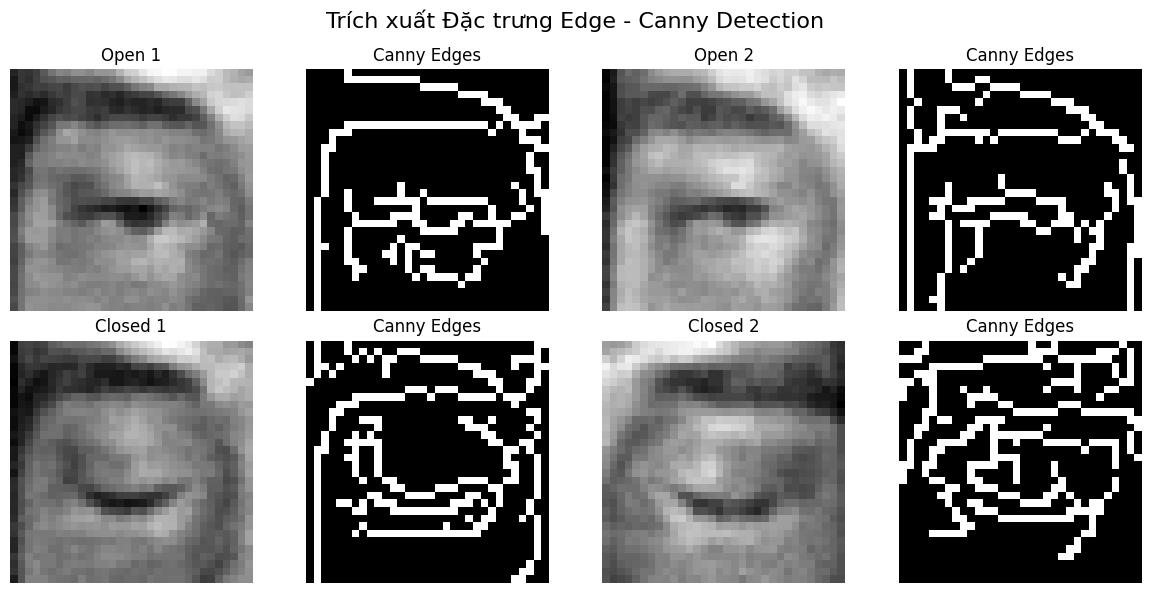

🔍 Phân tích Đặc trưng Canny Edge:
Canny Edge Density: Open=0.198, Closed=0.234, Diff=0.036


In [26]:
def extract_edge_features(img):
    """Trích xuất 1 đặc trưng Canny edge detection"""
    # Canny edges
    edges_canny = cv2.Canny(img, 30, 100)
    canny_density = np.sum(edges_canny > 0) / edges_canny.size
    
    return {
        'canny_edge_density': canny_density
    }

# Visualization của Canny edge detection
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, img in enumerate(open_resized):
    # Original
    axes[0, i*2].imshow(img, cmap='gray')
    axes[0, i*2].set_title(f'Open {i+1}')
    axes[0, i*2].axis('off')
    
    # Canny
    edges = cv2.Canny(img, 30, 100)
    axes[0, i*2+1].imshow(edges, cmap='gray')
    axes[0, i*2+1].set_title('Canny Edges')
    axes[0, i*2+1].axis('off')

for i, img in enumerate(closed_resized):
    # Original
    axes[1, i*2].imshow(img, cmap='gray')
    axes[1, i*2].set_title(f'Closed {i+1}')
    axes[1, i*2].axis('off')
    
    # Canny
    edges = cv2.Canny(img, 30, 100)
    axes[1, i*2+1].imshow(edges, cmap='gray')
    axes[1, i*2+1].set_title('Canny Edges')
    axes[1, i*2+1].axis('off')

plt.suptitle('Trích xuất Đặc trưng Edge - Canny Detection', fontsize=16)
plt.tight_layout()
plt.show()

# Tính toán edge features
open_edges = [extract_edge_features(img) for img in open_resized]
closed_edges = [extract_edge_features(img) for img in closed_resized]

print("🔍 Phân tích Đặc trưng Canny Edge:")
open_avg = np.mean([e['canny_edge_density'] for e in open_edges])
closed_avg = np.mean([e['canny_edge_density'] for e in closed_edges])
print(f"Canny Edge Density: Open={open_avg:.3f}, Closed={closed_avg:.3f}, Diff={abs(open_avg-closed_avg):.3f}")

## 📊 Trích xuất Đặc trưng Gradient (4 features)

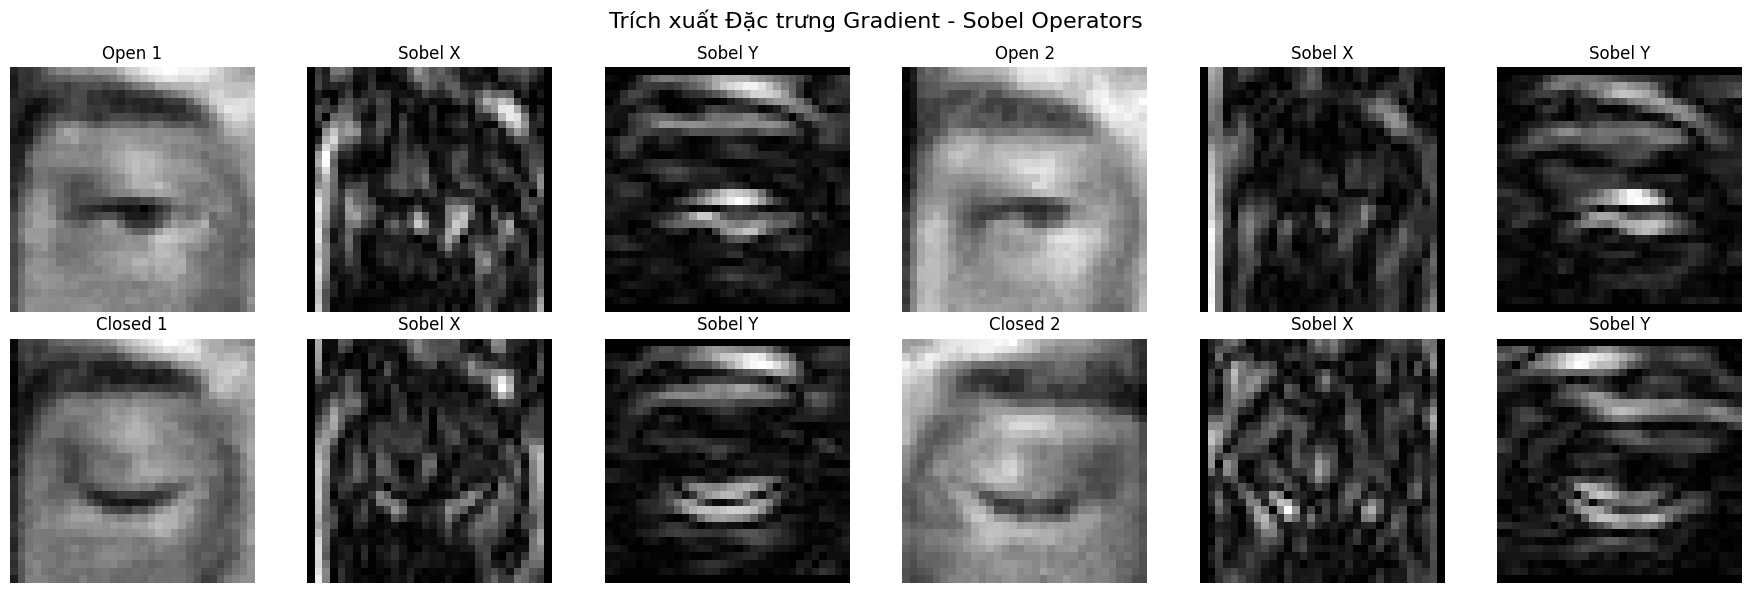

📊 Phân tích Đặc trưng Gradient:
   sobel_x_mean: Open=28.055, Closed=24.120, Diff=3.935
   sobel_y_mean: Open=34.435, Closed=34.174, Diff=0.260
     grad_x_std: Open=38.852, Closed=31.500, Diff=7.352
     grad_y_std: Open=51.882, Closed=51.532, Diff=0.350


In [27]:
def extract_gradient_features(img):
    """Trích xuất 4 đặc trưng gradient"""
    # Sobel X
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x_mean = np.mean(np.abs(sobel_x))
    
    # Sobel Y
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y_mean = np.mean(np.abs(sobel_y))
    
    # Gradient std
    grad_x_std = np.std(sobel_x)
    grad_y_std = np.std(sobel_y)
    
    return {
        'sobel_x_mean': sobel_x_mean,
        'sobel_y_mean': sobel_y_mean,
        'grad_x_std': grad_x_std,
        'grad_y_std': grad_y_std
    }

# Visualization của gradient features
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for i, img in enumerate(open_resized):
    # Original
    axes[0, i*3].imshow(img, cmap='gray')
    axes[0, i*3].set_title(f'Open {i+1}')
    axes[0, i*3].axis('off')
    
    # Sobel X
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    axes[0, i*3+1].imshow(np.abs(sobel_x), cmap='gray')
    axes[0, i*3+1].set_title('Sobel X')
    axes[0, i*3+1].axis('off')
    
    # Sobel Y
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    axes[0, i*3+2].imshow(np.abs(sobel_y), cmap='gray')
    axes[0, i*3+2].set_title('Sobel Y')
    axes[0, i*3+2].axis('off')

for i, img in enumerate(closed_resized):
    # Original
    axes[1, i*3].imshow(img, cmap='gray')
    axes[1, i*3].set_title(f'Closed {i+1}')
    axes[1, i*3].axis('off')
    
    # Sobel X
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    axes[1, i*3+1].imshow(np.abs(sobel_x), cmap='gray')
    axes[1, i*3+1].set_title('Sobel X')
    axes[1, i*3+1].axis('off')
    
    # Sobel Y
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    axes[1, i*3+2].imshow(np.abs(sobel_y), cmap='gray')
    axes[1, i*3+2].set_title('Sobel Y')
    axes[1, i*3+2].axis('off')

plt.suptitle('Trích xuất Đặc trưng Gradient - Sobel Operators', fontsize=16)
plt.tight_layout()
plt.show()

# Tính toán gradient features
open_gradients = [extract_gradient_features(img) for img in open_resized]
closed_gradients = [extract_gradient_features(img) for img in closed_resized]

print("📊 Phân tích Đặc trưng Gradient:")
gradient_metrics = ['sobel_x_mean', 'sobel_y_mean', 'grad_x_std', 'grad_y_std']
for metric in gradient_metrics:
    open_avg = np.mean([g[metric] for g in open_gradients])
    closed_avg = np.mean([g[metric] for g in closed_gradients])
    print(f"{metric:>15}: Open={open_avg:.3f}, Closed={closed_avg:.3f}, Diff={abs(open_avg-closed_avg):.3f}")

## 🔧 Trích xuất Đặc trưng Morphological (4 features)

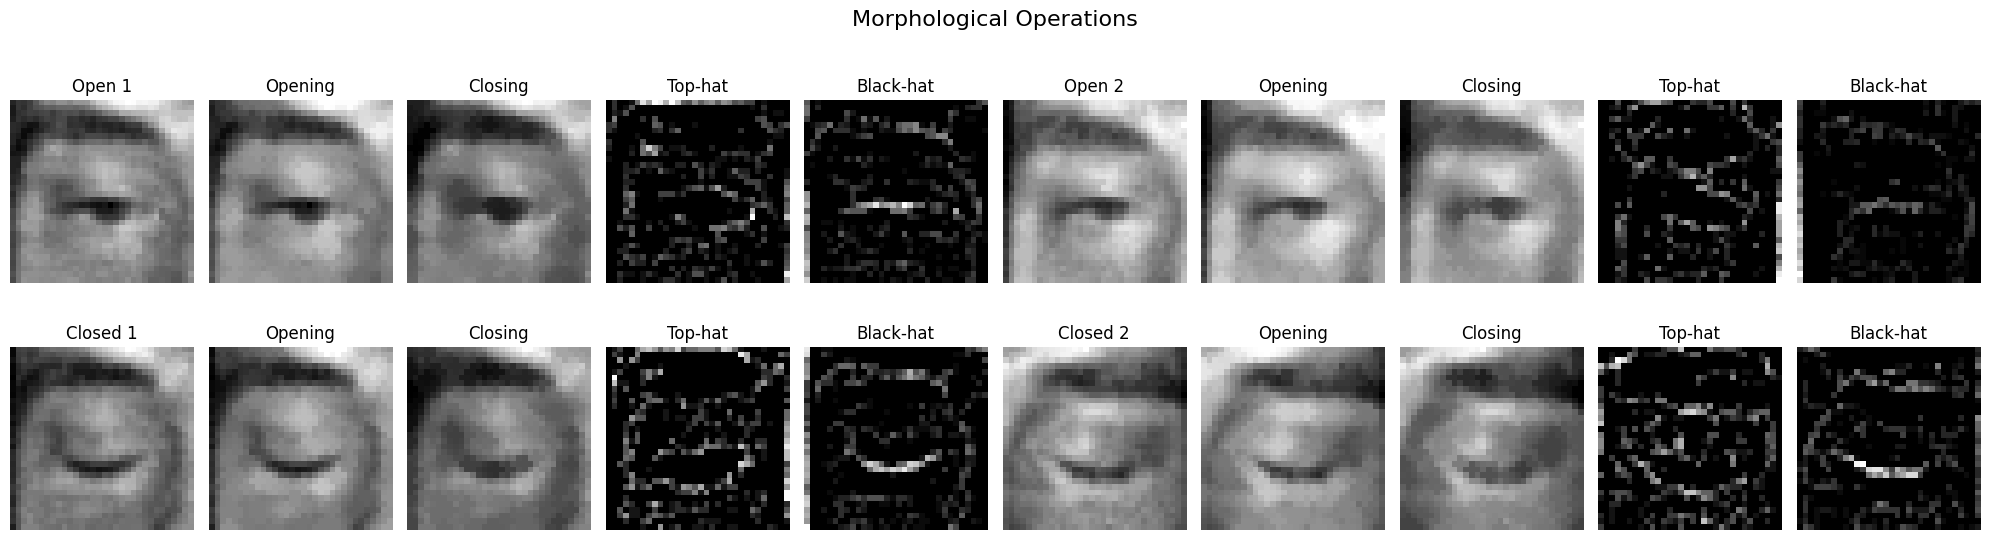

🔧 Phân tích Đặc trưng Morphological:
   opening_mean: Open=92.80, Closed=93.84, Diff=1.04
   closing_mean: Open=95.28, Closed=96.44, Diff=1.17
    tophat_mean: Open=1.07, Closed=1.12, Diff=0.05
  blackhat_mean: Open=1.41, Closed=1.48, Diff=0.07


In [28]:
def extract_morphological_features(img):
    """Trích xuất 4 đặc trưng morphological"""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    
    # 1. Opening
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    opening_mean = np.mean(opening)
    
    # 2. Closing
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    closing_mean = np.mean(closing)
    
    # 3. Top-hat
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    tophat_mean = np.mean(tophat)
    
    # 4. Black-hat
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
    blackhat_mean = np.mean(blackhat)
    
    return {
        'opening_mean': opening_mean,
        'closing_mean': closing_mean,
        'tophat_mean': tophat_mean,
        'blackhat_mean': blackhat_mean
    }

# Visualization morphological operations
fig, axes = plt.subplots(2, 10, figsize=(20, 6))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

for i, img in enumerate(open_resized):
    # Original
    axes[0, i*5].imshow(img, cmap='gray')
    axes[0, i*5].set_title(f'Open {i+1}')
    axes[0, i*5].axis('off')
    
    # Opening
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    axes[0, i*5+1].imshow(opening, cmap='gray')
    axes[0, i*5+1].set_title('Opening')
    axes[0, i*5+1].axis('off')
    
    # Closing
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    axes[0, i*5+2].imshow(closing, cmap='gray')
    axes[0, i*5+2].set_title('Closing')
    axes[0, i*5+2].axis('off')
    
    # Top-hat
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    axes[0, i*5+3].imshow(tophat, cmap='gray')
    axes[0, i*5+3].set_title('Top-hat')
    axes[0, i*5+3].axis('off')
    
    # Black-hat
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
    axes[0, i*5+4].imshow(blackhat, cmap='gray')
    axes[0, i*5+4].set_title('Black-hat')
    axes[0, i*5+4].axis('off')

for i, img in enumerate(closed_resized):
    # Original
    axes[1, i*5].imshow(img, cmap='gray')
    axes[1, i*5].set_title(f'Closed {i+1}')
    axes[1, i*5].axis('off')
    
    # Opening
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    axes[1, i*5+1].imshow(opening, cmap='gray')
    axes[1, i*5+1].set_title('Opening')
    axes[1, i*5+1].axis('off')
    
    # Closing
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    axes[1, i*5+2].imshow(closing, cmap='gray')
    axes[1, i*5+2].set_title('Closing')
    axes[1, i*5+2].axis('off')
    
    # Top-hat
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    axes[1, i*5+3].imshow(tophat, cmap='gray')
    axes[1, i*5+3].set_title('Top-hat')
    axes[1, i*5+3].axis('off')
    
    # Black-hat
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
    axes[1, i*5+4].imshow(blackhat, cmap='gray')
    axes[1, i*5+4].set_title('Black-hat')
    axes[1, i*5+4].axis('off')

plt.suptitle('Morphological Operations', fontsize=16)
plt.tight_layout()
plt.show()

# Tính toán morphological features
open_morph = [extract_morphological_features(img) for img in open_resized]
closed_morph = [extract_morphological_features(img) for img in closed_resized]

print("🔧 Phân tích Đặc trưng Morphological:")
morph_metrics = ['opening_mean', 'closing_mean', 'tophat_mean', 'blackhat_mean']
for metric in morph_metrics:
    open_avg = np.mean([m[metric] for m in open_morph])
    closed_avg = np.mean([m[metric] for m in closed_morph])
    print(f"{metric:>15}: Open={open_avg:.2f}, Closed={closed_avg:.2f}, Diff={abs(open_avg-closed_avg):.2f}")

## 📊 Trích xuất Đặc trưng Histogram (7 features)

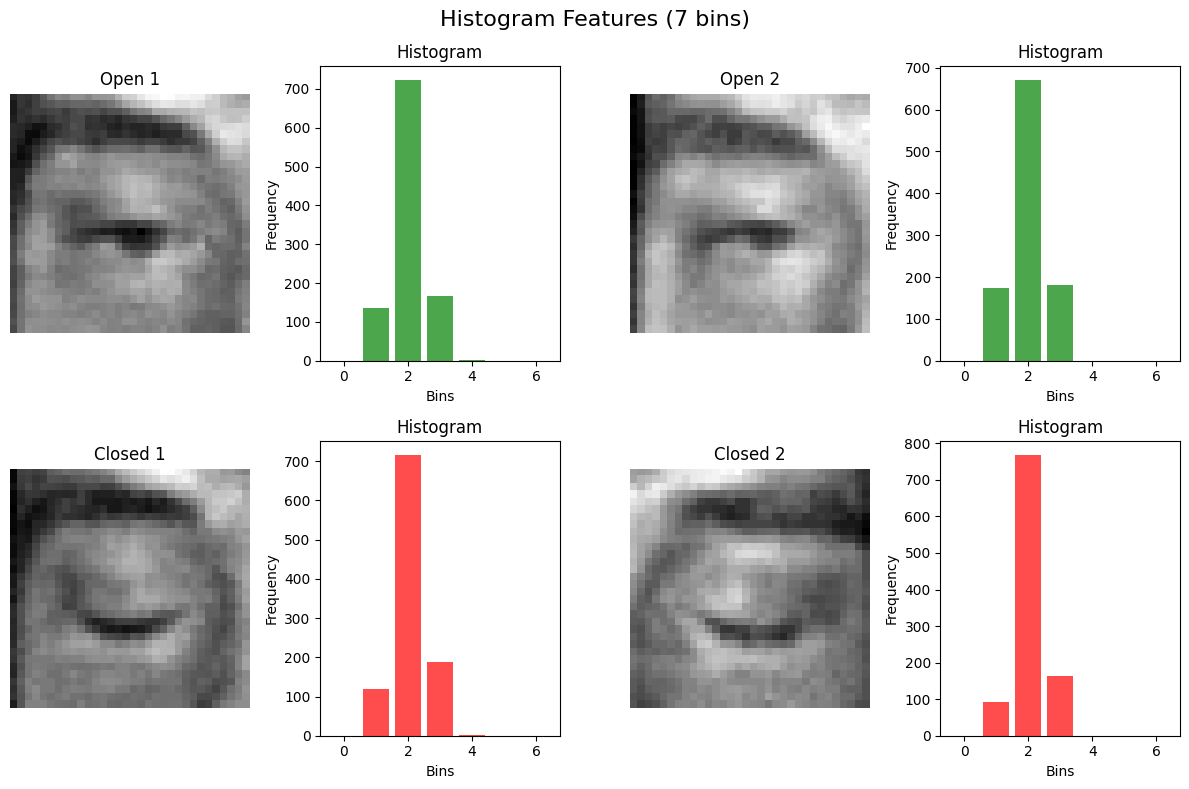

📊 Phân tích Đặc trưng Histogram:
Bin 0: Open=0.0, Closed=0.0, Diff=0.0
Bin 1: Open=154.0, Closed=105.5, Diff=48.5
Bin 2: Open=696.0, Closed=741.0, Diff=45.0
Bin 3: Open=173.5, Closed=176.0, Diff=2.5
Bin 4: Open=0.5, Closed=1.5, Diff=1.0
Bin 5: Open=0.0, Closed=0.0, Diff=0.0
Bin 6: Open=0.0, Closed=0.0, Diff=0.0


In [29]:
def extract_histogram_features(img, bins=7):
    """Trích xuất 7 đặc trưng histogram"""
    hist = cv2.calcHist([img], [0], None, [bins], [0, 256])
    # Normalize histogram
    hist = hist.flatten()
    
    return {f'hist_bin_{i}': hist[i] for i in range(bins)}

# Visualization histogram
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, img in enumerate(open_resized):
    # Original image
    axes[0, i*2].imshow(img, cmap='gray')
    axes[0, i*2].set_title(f'Open {i+1}')
    axes[0, i*2].axis('off')
    
    # Histogram
    hist = cv2.calcHist([img], [0], None, [7], [0, 256])
    axes[0, i*2+1].bar(range(7), hist.flatten(), alpha=0.7, color='green')
    axes[0, i*2+1].set_title('Histogram')
    axes[0, i*2+1].set_xlabel('Bins')
    axes[0, i*2+1].set_ylabel('Frequency')

for i, img in enumerate(closed_resized):
    # Original image
    axes[1, i*2].imshow(img, cmap='gray')
    axes[1, i*2].set_title(f'Closed {i+1}')
    axes[1, i*2].axis('off')
    
    # Histogram
    hist = cv2.calcHist([img], [0], None, [7], [0, 256])
    axes[1, i*2+1].bar(range(7), hist.flatten(), alpha=0.7, color='red')
    axes[1, i*2+1].set_title('Histogram')
    axes[1, i*2+1].set_xlabel('Bins')
    axes[1, i*2+1].set_ylabel('Frequency')

plt.suptitle('Histogram Features (7 bins)', fontsize=16)
plt.tight_layout()
plt.show()

# Tính toán histogram features
open_hist = [extract_histogram_features(img) for img in open_resized]
closed_hist = [extract_histogram_features(img) for img in closed_resized]

print("📊 Phân tích Đặc trưng Histogram:")
for i in range(7):
    metric = f'hist_bin_{i}'
    open_avg = np.mean([h[metric] for h in open_hist])
    closed_avg = np.mean([h[metric] for h in closed_hist])
    print(f"Bin {i}: Open={open_avg:.1f}, Closed={closed_avg:.1f}, Diff={abs(open_avg-closed_avg):.1f}")

## 🔄 Tổng hợp Tất cả Features (25 features)

In [ ]:
def extract_all_features(img):
    """Tổng hợp tất cả 25 features theo đúng feature_extractor.py"""
    features = []
    
    # Statistical features (6)
    features.extend([
        np.mean(img), np.std(img), np.var(img),
        np.min(img), np.max(img), np.median(img)
    ])

    # Texture features (3)
    center = img[12:20, 12:20]
    features.extend([
        np.mean(center), np.std(center),
        np.mean(center) - np.mean(img)
    ])

    # Edge features (1)
    edges = cv2.Canny(img, 30, 100)
    features.append(np.sum(edges) / (32 * 32))

    # Gradient features (4)
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    features.extend([
        np.mean(np.abs(grad_x)), np.mean(np.abs(grad_y)),
        np.std(grad_x), np.std(grad_y)
    ])

    # Morphological features (4)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    features.extend([
        np.mean(opened), np.mean(closed),
        np.mean(img - opened), np.mean(closed - img)
    ])

    # Histogram features (7)
    hist = cv2.calcHist([img], [0], None, [7], [0, 256])
    features.extend(hist.flatten())

    return np.array(features)

# Trích xuất tất cả features
open_all_features = [extract_all_features(img) for img in open_resized]
closed_all_features = [extract_all_features(img) for img in closed_resized]

# Feature names theo đúng thứ tự
feature_names = [
    'mean', 'std', 'var', 'min', 'max', 'median',  # Statistical (6)
    'center_mean', 'center_std', 'center_diff',     # Texture (3)
    'edge_density',                                 # Edge (1)
    'grad_x_mean', 'grad_y_mean', 'grad_x_std', 'grad_y_std',  # Gradient (4)
    'morph_open', 'morph_close', 'open_diff', 'close_diff',    # Morphological (4)
    'hist_0', 'hist_1', 'hist_2', 'hist_3', 'hist_4', 'hist_5', 'hist_6',  # Histogram (7)
]

print(f"📋 Tổng số features: {len(feature_names)}")
print("\n🔍 Danh sách 25 Features:")

categories = {
    'Statistical (6)': feature_names[0:6],
    'Texture (3)': feature_names[6:9],
    'Edge (1)': feature_names[9:10],
    'Gradient (4)': feature_names[10:14],
    'Morphological (4)': feature_names[14:18],
    'Histogram (7)': feature_names[18:25]
}

for category, features in categories.items():
    print(f"\n{category}:")
    for i, feature in enumerate(features, 1):
        print(f"  {i:2d}. {feature}")

## 📈 Phân tích Discriminative Power của Features

In [ ]:
# Tính toán discriminative power
discriminative_scores = []

for i, feature_name in enumerate(feature_names):
    open_vals = [f[i] for f in open_all_features]
    closed_vals = [f[i] for f in closed_all_features]
    
    open_mean = np.mean(open_vals)
    closed_mean = np.mean(closed_vals)
    
    # Tính separation score
    diff = abs(open_mean - closed_mean)
    combined_std = (np.std(open_vals) + np.std(closed_vals)) / 2
    
    if combined_std > 0:
        score = diff / combined_std
    else:
        score = 0
    
    discriminative_scores.append((feature_name, score, open_mean, closed_mean))

# Sort by discriminative power
discriminative_scores.sort(key=lambda x: x[1], reverse=True)

# Visualization top discriminative features
top_features = discriminative_scores[:10]
feature_names_top = [f[0] for f in top_features]
scores = [f[1] for f in top_features]

plt.figure(figsize=(15, 8))
bars = plt.barh(range(len(top_features)), scores, color='skyblue')
plt.yticks(range(len(top_features)), [f.replace('_', ' ').title() for f in feature_names_top])
plt.xlabel('Discriminative Score (Mean Difference / Std)')
plt.title('Top 10 Most Discriminative Features')
plt.grid(axis='x', alpha=0.3)

# Add score values on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(score + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{score:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("🏆 Top 10 Most Discriminative Features:")
for i, (name, score, open_mean, closed_mean) in enumerate(top_features, 1):
    print(f"{i:2d}. {name:25} | Score: {score:.3f} | Open: {open_mean:.3f} | Closed: {closed_mean:.3f}")

## 🎯 Chuẩn bị Dữ liệu cho Machine Learning

In [ ]:
# Tạo feature matrix và labels
X_open = np.array(open_all_features)
X_closed = np.array(closed_all_features)

X = np.vstack([X_open, X_closed])
y = np.hstack([np.ones(len(X_open)), np.zeros(len(X_closed))])  # 1=open, 0=closed

print(f"📊 Final Dataset Shape:")
print(f"Features matrix (X): {X.shape}")
print(f"Labels vector (y): {y.shape}")
print(f"Open eyes: {np.sum(y == 1)} samples")
print(f"Closed eyes: {np.sum(y == 0)} samples")

# Feature statistics
print(f"\n📈 Feature Statistics:")
print(f"Feature range: [{X.min():.3f}, {X.max():.3f}]")
print(f"Feature means: {X.mean(axis=0)[:5]} ... (showing first 5)")
print(f"Feature stds: {X.std(axis=0)[:5]} ... (showing first 5)")

print("\n✅ Dữ liệu đã sẵn sàng cho Machine Learning!")
print("📋 Các bước tiếp theo:")
print("   1. Feature scaling/normalization")
print("   2. Train-test split")
print("   3. Model training và evaluation")
print("   4. Hyperparameter tuning")
print("   5. Ensemble methods")